In [18]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data1 = pd.read_csv("New_way_data _base.csv")

In [3]:
#data = np.loadtxt("dataset_OBD_new.csv",delimiter=",")

In [4]:
data1.shape

(11999, 8)

In [5]:
data1.head()

,BAROMETRIC_PRESSURE,ENGINE_COOLANT_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,SPEED,THROTTLE_POS,class
0,101.000000,89.000000,1173.000000,35.000000,3.470000,9.000000,0.184000,0
1,95.317414,104.702540,4793.486993,69.295708,51.247763,56.748608,0.700599,1
2,96.340461,104.444472,3649.884731,58.358234,68.126434,11.383728,0.637216,1
3,100.000000,84.000000,1582.000000,82.000000,26.920000,44.000000,0.369000,0
4,99.000000,85.000000,1657.000000,37.000000,9.290000,36.000000,0.278000,0


In [6]:
data = np.array(data1)

In [7]:
data[0]

array([1.010e+02, 8.900e+01, 1.173e+03, 3.500e+01, 3.470e+00, 9.000e+00,
       1.840e-01, 0.000e+00])

In [8]:
data.shape

(11999, 8)

In [9]:
x = data[:,0:-1]
y = data[:,-1]

# Spliting dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(x.shape)
print(y.shape)

(11999, 7)
(11999,)


In [10]:
x_train.shape

(9599, 7)

In [11]:
x_test.shape

(2400, 7)

In [12]:
y_test.shape

(2400,)

In [13]:
y_train.shape

(9599,)

In [14]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
y_train

array([0., 0., 0., ..., 0., 0., 1.])

In [16]:
x_train.shape[1]

7

# Creating the model

In [69]:
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

# Compiling the model 

In [70]:
learning_rate = 0.001
model.compile(loss="binary_crossentropy",metrics=['accuracy'],optimizer=Adam(learning_rate))

# Training 

In [71]:
epochs = 20
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
300/300 [==============================] - 1s 2ms/step - loss: 2.1914 - accuracy: 0.5862 - val_loss: 0.4475 - val_accuracy: 0.6283
Epoch 2/20
300/300 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.6568 - val_loss: 0.2789 - val_accuracy: 0.9438
Epoch 3/20
300/300 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8508 - val_loss: 0.1655 - val_accuracy: 0.9837
Epoch 4/20
300/300 [==============================] - 0s 1ms/step - loss: 0.1861 - accuracy: 0.8907 - val_loss: 0.0340 - val_accuracy: 0.9892
Epoch 5/20
300/300 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.9150 - val_loss: 0.0276 - val_accuracy: 0.9912
Epoch 6/20
300/300 [==============================] - 0s 1ms/step - loss: 0.1244 - accuracy: 0.9360 - val_loss: 0.0236 - val_accuracy: 0.9933
Epoch 7/20
300/300 [==============================] - 0s 984us/step - loss: 0.1125 - accuracy: 0.9413 - val_loss: 0.0203 - val_accuracy: 0.9933
Epoc

# Ploting 

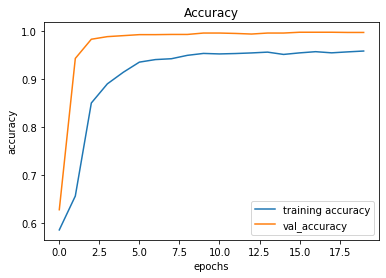

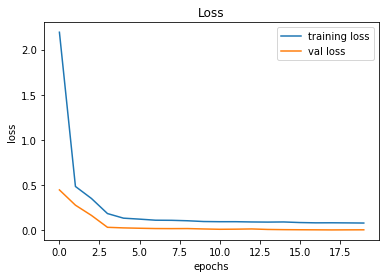

In [72]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import accuracy_score

# prediction on training data
label = np.array(y_train)
pred_train = model.predict_classes(x_train)
print("Accuracy on training data = ",accuracy_score(label,pred_train)*100,"%")

# prediction on test data
label = np.array(y_test)
pred_test = model.predict_classes(x_test)
print("Accuracy on test data = ",accuracy_score(label,pred_test)*100,"%")
print(pred_test.reshape(1,y_test.shape[0]))
print(label)

Accuracy on training data =  99.88540472965934 %
Accuracy on test data =  99.79166666666667 %
[[0 0 0 ... 0 0 0]]
[0. 0. 0. ... 0. 0. 0.]


In [74]:
model.save('anomaly_detection_model_final_2.h5')

# Loading the model

In [76]:
from keras.models import load_model

In [77]:
model = load_model('anomaly_detection_model_final_2.h5')

In [78]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 10)                80        
_________________________________________________________________
dropout_40 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_41 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_53 (Dense)             (None, 12)                108       
_________________________________________________________________
dropout_42 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 6)               

In [79]:
# Trying with real world input
samples = np.array([data[6][0:-1]])     
samples

array([[1.000e+02, 8.300e+01, 1.952e+03, 1.900e+01, 5.260e+00, 5.700e+01,
        2.310e-01]])

In [80]:
prediction = model.predict_classes(samples)
prediction

array([[0]])

In [81]:
pred = model.predict(samples)
pred

array([[9.260451e-17]], dtype=float32)

In [82]:
# Trying with real world input
samples = np.array([data[8][0:-1]])     
samples

array([[9.60060998e+01, 1.06088416e+02, 4.27411399e+03, 2.05487186e+01,
        6.39619993e+01, 1.81517542e+01, 8.29642283e-01]])

In [83]:
prediction = model.predict_classes(samples)
prediction

array([[1]])

In [84]:
pred = model.predict(samples)
pred

array([[1.]], dtype=float32)